## Analyze results of ZSCG on MNIST 

### Results

Morover it has been seen that the success rate was fairly independent by the guassian smoothing parameter *v* and by the momentum *alpha* with good values respectively 0.001 and 0.2. For this reason the results are taken by changing the different level of *epsilon* and *n_gradient* (the upper bound of the norm and the number of function evaluation per step).

The maximum number of step has been set to 100.

**N.B**
1. All the results are taken in the *google colab enviroment* using the available GPU *Tesla K80*. <br>
2. The results are all taken with the torch random seed set as *42*. <br>
3. The results are tanken using 100 random sample. In case for target attack with high number of model call for the gradient evaluation (*n_gradient*) 50/20 random examples were used. Results taken with only 50/20 examples are indicated with * and ** respectively
4. In the *target* case all the images sampled are used in a target attack against all the other category. For this reason using a sample of 20 images means, in the case of *MNIST*, means performing 180 attacks. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**1. Untarget attack on MNIST with** $L_{\infty}$

In [81]:
MUI = pd.read_csv('MUI.csv', index_col=0)
print('MUI has shape: {}'.format(MUI.shape))
epsilon_list = list(MUI.Epsilon.unique())
print('The upper bounds on the norm are:\n{}'.format(epsilon_list))
n_gradient = sorted(list(MUI.NGradient.unique()))
MUI

MUI has shape: (30, 12)
The upper bounds on the norm are:
[0.05, 0.1, 0.15, 0.2, 0.25]


,Optim,Data,Norm,Target,Epsilon,SuccesRate,MeanTime,NGradient,Alpha,GaussianSmoothing,Nexample,Epochs
0,classic,mnist,-1,0,0.05,0.11,1.575909,500,0.2,0.001,NaN,100
1,classic,mnist,-1,0,0.05,0.13,2.583177,1000,0.2,0.001,NaN,100
2,classic,mnist,-1,0,0.05,0.15,4.014399,2000,0.2,0.001,NaN,100
3,classic,mnist,-1,0,0.05,0.17,7.562910,4000,0.2,0.001,NaN,100
4,classic,mnist,-1,0,0.05,0.18,10.873395,8000,0.2,0.001,NaN,100
5,classic,mnist,-1,0,0.05,0.19,18.288775,16000,0.2,0.001,NaN,100
6,classic,mnist,-1,0,0.10,0.33,1.231200,500,0.2,0.001,NaN,100
7,classic,mnist,-1,0,0.10,0.40,1.856453,1000,0.2,0.001,NaN,100
8,classic,mnist,-1,0,0.10,0.43,2.823524,2000,0.2,0.001,NaN,100
9,classic,mnist,-1,0,0.10,0.48,4.950268,4000,0.2,0.001,NaN,100


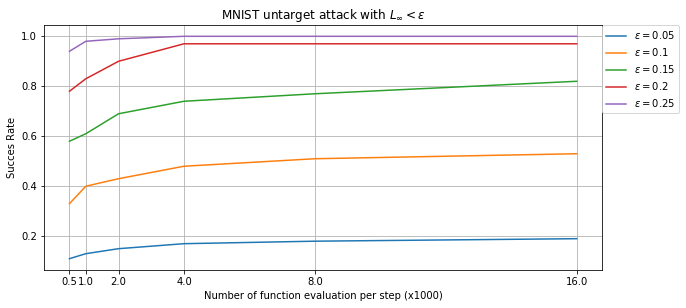

In [27]:
fig = plt.figure(figsize=(10, 4.5))
plt.title('MNIST untarget attack with $L_{\infty} < \epsilon$')
for eps in epsilon_list:
    c = MUI.Epsilon == eps
    plt.plot(MUI.NGradient[c], MUI.SuccesRate[c], label = r'$\epsilon = {}$'.format(eps))
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks(n_gradient, np.array(n_gradient)/1000, rotation=0)
plt.legend(loc=[1, 0.64])
plt.grid()
plt.show()

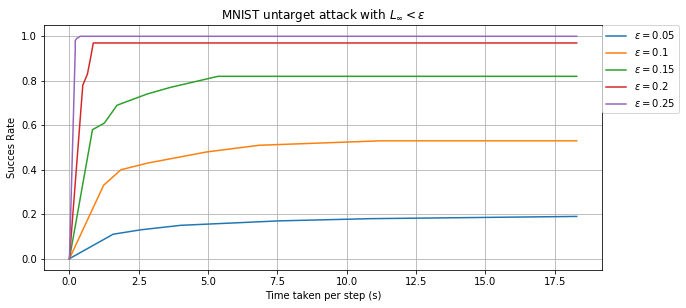

In [28]:
max_time = MUI.MeanTime.max()
def SR(df):
    return [0] + df.SuccesRate.tolist() + [df.SuccesRate.max()]
def Time(df):
    return [0] + df.MeanTime.tolist() + [max_time]

fig = plt.figure(figsize=(10, 4.5))
plt.title('MNIST untarget attack with $L_{\infty} < \epsilon$')
for eps in epsilon_list:
    c = MUI.Epsilon == eps
    plt.plot(Time(MUI[c]), SR(MUI[c]), label = r'$\epsilon = {}$'.format(eps))
plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend(loc=[1, 0.64])
plt.grid()
plt.show()

**2. Target attack on MNIST with** $L_{\infty}$

In [82]:
MTI = pd.read_csv('MTI.csv', index_col=0)
print('MTI has shape: {}'.format(MTI.shape))
epsilon_list = list(MTI.Epsilon.unique())
print('The upper bounds on the norm are:\n{}'.format(epsilon_list))
n_gradient = sorted(list(MTI.NGradient.unique()))
MTI

MTI has shape: (25, 12)
The upper bounds on the norm are:
[0.1, 0.2, 0.3, 0.4, 0.5]


,Optim,Data,Norm,Target,Epsilon,SuccesRate,MeanTime,NGradient,Alpha,GaussianSmoothing,Nexample,Epochs
0,classic,mnist,-1,0,0.1,0.072222,1.643592,500,0.2,0.001,NaN,100
1,classic,mnist,-1,0,0.1,0.083333,2.735554,1000,0.2,0.001,NaN,100
2,classic,mnist,-1,0,0.1,0.094444,4.331026,2000,0.2,0.001,NaN,100
3,classic,mnist,-1,0,0.1,0.100000,8.229841,4000,0.2,0.001,NaN,100
4,classic,mnist,-1,0,0.1,0.100000,11.939104,8000,0.2,0.001,NaN,100
5,classic,mnist,-1,0,0.2,0.294444,1.314892,500,0.2,0.001,NaN,100
6,classic,mnist,-1,0,0.2,0.350000,2.028369,1000,0.2,0.001,NaN,100
7,classic,mnist,-1,0,0.2,0.427778,2.911536,2000,0.2,0.001,NaN,100
8,classic,mnist,-1,0,0.2,0.494444,5.031186,4000,0.2,0.001,NaN,100
9,classic,mnist,-1,0,0.2,0.555556,6.632288,8000,0.2,0.001,NaN,100


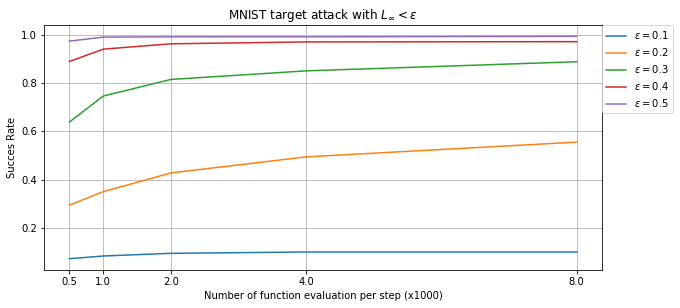

In [32]:
fig = plt.figure(figsize=(10, 4.5))
plt.title('MNIST target attack with $L_{\infty} < \epsilon$')
for eps in epsilon_list:
    c = MTI.Epsilon == eps
    plt.plot(MTI.NGradient[c], MTI.SuccesRate[c], label = r'$\epsilon = {}$'.format(eps))
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks(n_gradient, np.array(n_gradient)/1000, rotation=0)
plt.legend(loc=[1, 0.64])
plt.grid()
plt.show()

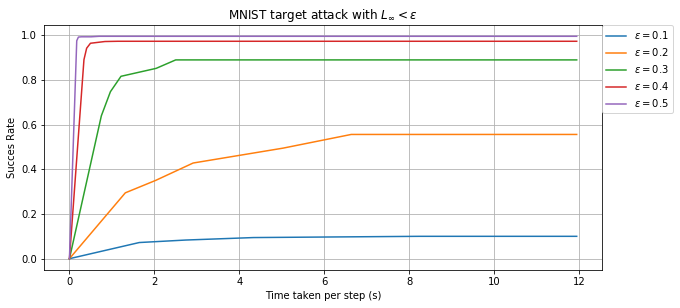

In [33]:
max_time = MTI.MeanTime.max()
def SR(df):
    return [0] + df.SuccesRate.tolist() + [df.SuccesRate.max()]
def Time(df):
    return [0] + df.MeanTime.tolist() + [max_time]

fig = plt.figure(figsize=(10, 4.5))
plt.title('MNIST target attack with $L_{\infty} < \epsilon$')
for eps in epsilon_list:
    c = MTI.Epsilon == eps
    plt.plot(Time(MTI[c]), SR(MTI[c]), label = r'$\epsilon = {}$'.format(eps))
plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend(loc=[1, 0.64])
plt.grid()
plt.show()

**3. Untarget attack on MNIST with L2**

In [75]:
MU2 = pd.read_csv('MU2.csv', index_col=0)
print('MU2 has shape: {}'.format(MU2.shape))
epsilon_list = list(MU2.Epsilon.unique())
print('The upper bounds on the norm are:\n{}'.format(epsilon_list))
n_gradient = sorted(list(MU2.NGradient.unique()))
MU2

MU2 has shape: (12, 14)
The upper bounds on the norm are:
[3.0, 2.0]


,Optim,Data,Norm,Epsilon,Target,SuccesRate,MeanTime,MeanEpsilon,NGradient,BatchSize,Alpha,GaussianSmoothing,Nexample,Epochs
0,classic,mnist,2,3.0,0,0.75,0.272862,1.525208,500,-1,0.2,0.001,100,100
1,classic,mnist,2,3.0,0,0.87,0.267437,1.553225,1000,-1,0.2,0.001,100,100
2,classic,mnist,2,3.0,0,0.95,0.268914,1.559463,2000,-1,0.2,0.001,100,100
3,classic,mnist,2,3.0,0,0.97,0.386725,1.547536,4000,-1,0.2,0.001,100,100
4,classic,mnist,2,3.0,0,0.98,0.552038,1.532811,8000,4000,0.2,0.001,100,100
5,classic,mnist,2,3.0,0,0.98,0.943227,1.525014,16000,4000,0.2,0.001,100,100
6,classic,mnist,2,2.0,0,0.44,0.490586,1.141499,500,-1,0.2,0.001,100,100
7,classic,mnist,2,2.0,0,0.59,0.625211,1.213797,1000,-1,0.2,0.001,100,100
8,classic,mnist,2,2.0,0,0.65,0.952350,1.252874,2000,-1,0.2,0.001,100,100
9,classic,mnist,2,2.0,0,0.71,1.574040,1.284826,4000,-1,0.2,0.001,100,100


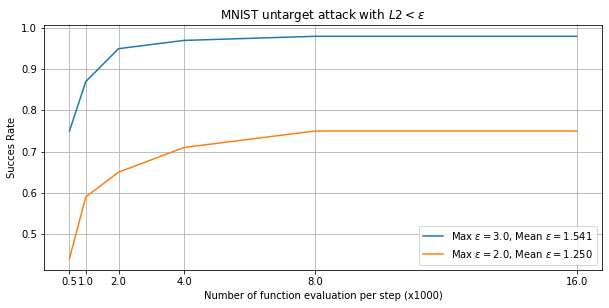

In [73]:
fig = plt.figure(figsize=(10, 4.5))
plt.title('MNIST untarget attack with $L2 < \epsilon$')
for eps in epsilon_list:
    c = MU2.Epsilon == eps
    mean_eps = MU2.MeanEpsilon[c].mean()
    plt.plot(MU2.NGradient[c], MU2.SuccesRate[c], label=r'Max $\epsilon = {}$, Mean $\epsilon = {:.3f}$'.format(eps, mean_eps))
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks(n_gradient, np.array(n_gradient)/1000, rotation=0)
plt.legend()
plt.grid()
plt.show()

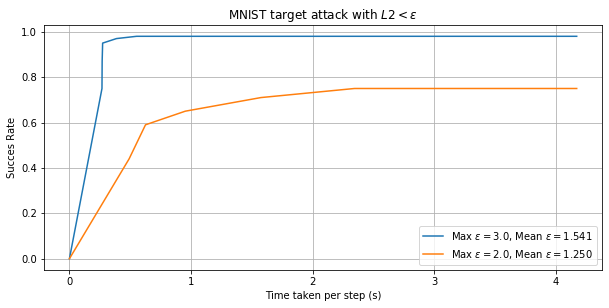

In [74]:
max_time = MU2.MeanTime.max()
def SR(df):
    return [0] + df.SuccesRate.tolist() + [df.SuccesRate.max()]
def Time(df):
    return sorted([0] + df.MeanTime.tolist() + [max_time])

fig = plt.figure(figsize=(10, 4.5))
plt.title('MNIST target attack with $L2 < \epsilon$')
for eps in epsilon_list:
    c = MU2.Epsilon == eps
    mean_eps = MU2.MeanEpsilon[c].mean()
    plt.plot(Time(MU2[c]), SR(MU2[c]), label=r'Max $\epsilon = {}$, Mean $\epsilon = {:.3f}$'.format(eps, mean_eps))
plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend()
plt.grid()
plt.show()

**4. Target attack on MNIST with L2**

In [66]:
MT2 = pd.read_csv('MT2.csv', index_col=0).sort_values(by='NGradient').iloc[:-1, :].sort_values(by='SuccesRate')
print('MU2 has shape: {}'.format(MT2.shape))
epsilon_list = list(MT2.Epsilon.unique())
print('The upper bounds on the norm are:\n{}'.format(epsilon_list))
n_gradient = sorted(list(MT2.NGradient.unique()))
MT2.head(8)

MU2 has shape: (7, 14)
The upper bounds on the norm are:
[4.0]


,Optim,Data,Norm,Epsilon,Target,SuccesRate,MeanTime,MeanEpsilon,NGradient,BatchSize,Alpha,GaussianSmoothing,Nexample,Epochs
4,classic,mnist,2,4.0,1,0.583333,0.492030,2.268522,500,-1,0.2,0.001,20,100
0,classic,mnist,2,4.0,1,0.716667,0.527508,2.315139,1000,-1,0.2,0.001,20,100
1,classic,mnist,2,4.0,1,0.827778,0.693417,2.317139,2000,-1,0.2,0.001,20,100
5,classic,mnist,2,4.0,1,0.872222,1.117902,2.335179,4000,-1,0.2,0.001,20,100
6,classic,mnist,2,4.0,1,0.872222,1.712116,2.324835,8000,4000,0.2,0.001,20,100
2,classic,mnist,2,4.0,1,0.888889,2.757513,2.321659,16000,4000,0.2,0.001,20,100
7,classic,mnist,2,4.0,1,0.894444,4.979423,2.319200,32000,4000,0.2,0.001,20,100


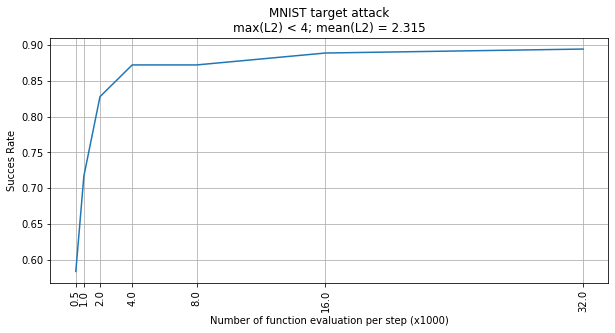

In [70]:
fig = plt.figure(figsize=(10, 4.5))
plt.title('MNIST target attack\nmax(L2) < 4; mean(L2) = {:.3f}'.format(MT2.MeanEpsilon.mean()))
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.plot(MT2.NGradient, MT2.SuccesRate)
plt.xticks(n_gradient, np.array(n_gradient)/1000, rotation=90)
plt.grid()
plt.show()